In [2]:
import pandas as pd
import urllib
from pprint import pprint as pp
import json

In [7]:
# download SSA big data map file

data = urllib.request.urlopen("https://www.ssa.gov/data.json").read()

In [8]:
data_json = json.loads(data)

In [9]:
for x in data_json['dataset']:
    if "Name" in x['title']:
        pp(x)

In [10]:
# Get zipfile of baby names
#https://stackoverflow.com/a/65106410/5650506

import requests, zipfile, io
r = requests.get('https://www.ssa.gov/oact/babynames/names.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./data/")

In [4]:
# put the txt file contents into a dataframe
# https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns

import os

df = pd.DataFrame()

for x in os.listdir("./data/"):
    if x[-4:] == ".txt":
        with open(f"./data/{x}") as f:
            current_file_df = pd.DataFrame(f.readlines())
            current_file_df[0] = current_file_df[0].str.replace('\n', '')
            current_file_df["year"] = x[3:-4]
            current_file_df[["name","sex","number"]] = current_file_df[0].str.split(",",3, expand=True)
            current_file_df["number"] = pd.to_numeric(current_file_df["number"])
            current_file_df["name"] = current_file_df["name"].str.lower()
            current_file_df[0]
            df = pd.concat(
                [df, current_file_df],
                ignore_index=True
            )
        #break
    #break

In [3]:
#remove the column that had the CSV data you needed to split 

df = df.drop(0, axis=1)

In [7]:
df_boys = df[(df['sex'] == "M")]
df_boys

,year,name,sex,number
17658,2000,jacob,M,34483
17659,2000,michael,M,32039
17660,2000,matthew,M,28573
17661,2000,joshua,M,27537
17662,2000,christopher,M,24933
...,...,...,...,...
2020858,2019,zyheem,M,5
2020859,2019,zykel,M,5
2020860,2019,zyking,M,5
2020861,2019,zyn,M,5


In [9]:
df_girls = df[(df['sex'] == "F")]
df_girls

,year,name,sex,number
0,2000,emily,F,25957
1,2000,hannah,F,23084
2,2000,madison,F,19968
3,2000,ashley,F,17997
4,2000,sarah,F,17706
...,...,...,...,...
2006776,2019,zyliyah,F,5
2006777,2019,zymia,F,5
2006778,2019,zyna,F,5
2006779,2019,zynlee,F,5


In [5]:
df_martin = df[(df['name'] == "martin") & (df['sex'] == "M")]
df_sadie = df[(df['name'] == "sadie") & (df['sex'] == "F")]
df_1880_girls = df[(df['year'] == "1880") & (df['number'].astype(int) < 320) & (df['sex'] == "F")]

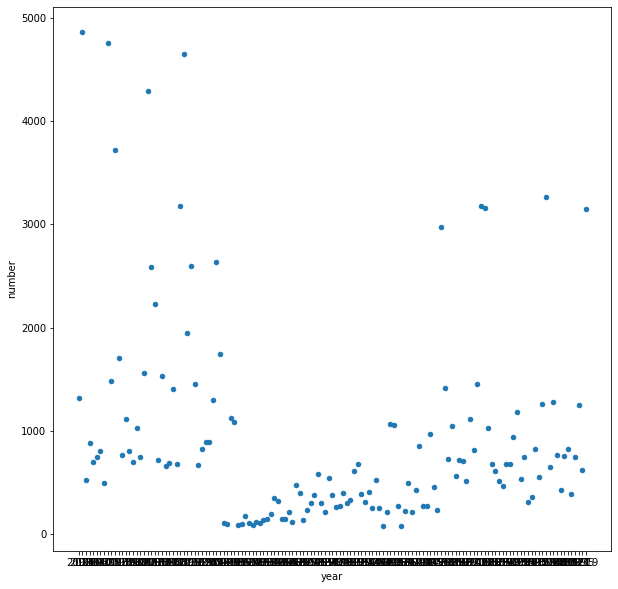

In [25]:
df_sadie.plot.scatter(x="year", y="number", figsize=(10,10))

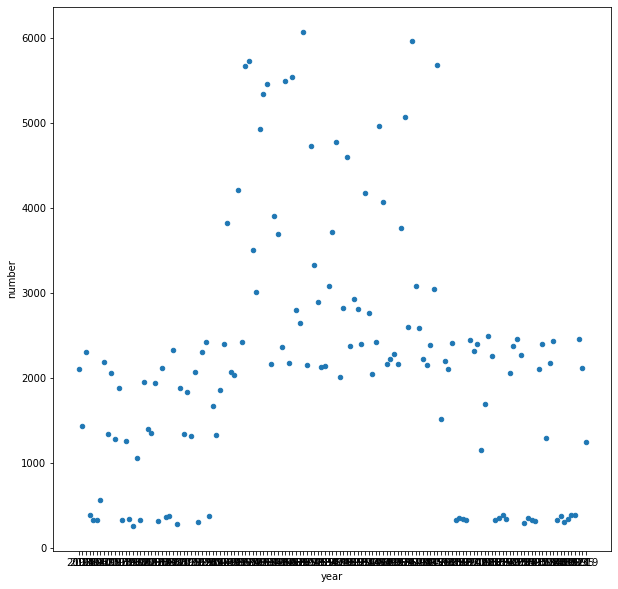

In [26]:
df_martin.plot.scatter(x="year", y="number",figsize=(10,10))

In [28]:
f_martin = df[(df['name'] == "martin") & (df['sex'] == "F")]
m_sadie = df[(df['name'] == "sadie") & (df['sex'] == "M")]

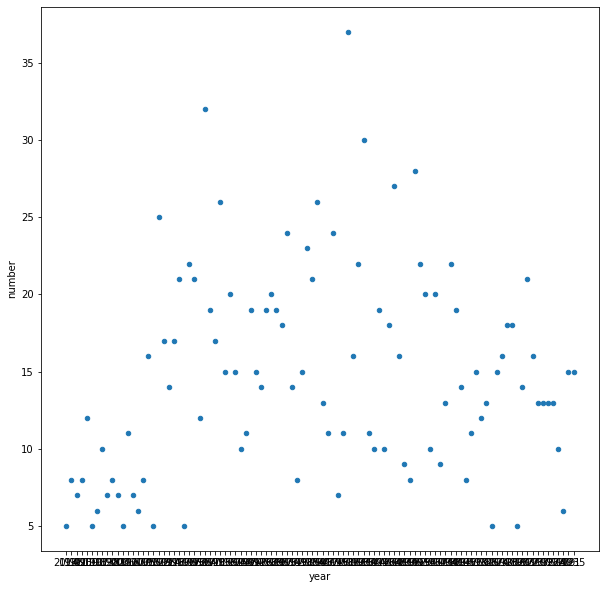

In [29]:
f_martin.plot.scatter(x="year", y="number",figsize=(10,10))

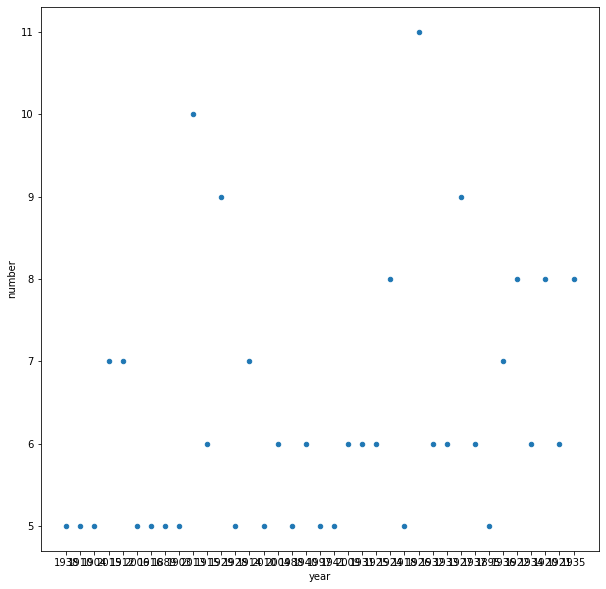

In [30]:
m_sadie.plot.scatter(x="year", y="number",figsize=(10,10))

In [19]:
df_1880_girls

,year,name,sex,number
1871692,1880,harriet,F,319
1871693,1880,sadie,F,317
1871694,1880,caroline,F,306
1871695,1880,katie,F,303
1871696,1880,lydia,F,302
...,...,...,...,...
1872557,1880,ula,F,5
1872558,1880,vannie,F,5
1872559,1880,verona,F,5
1872560,1880,vertie,F,5


In [31]:
both = df[(df['name'] == "martin") | (df['name'] == "sadie")]

In [33]:
both.head()

,year,name,sex,number
241,2000,sadie,F,1316
17832,2000,martin,M,2109
29822,2014,sadie,F,4864
48026,2014,martin,F,5
49244,2014,martin,M,1432


In [38]:
boolean = both['number'].duplicated()

In [40]:
dups = both[boolean]

In [41]:
dups

,year,name,sex,number
71996,1938,sadie,M,5
76668,1910,sadie,M,5
80245,1904,sadie,M,5
85814,1911,martin,F,8
127211,2015,sadie,M,7
...,...,...,...,...
1967339,1909,martin,M,391
1971396,1921,martin,F,15
1979064,1921,sadie,M,6
1981969,1935,martin,F,15


In [43]:
sexed = dups[((df['name'] == "martin") & (df.sex == "M")) | ((df['name'] == "sadie") & (df.sex == "F"))]

<ipython-input-43-8901bf36ae8b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sexed = dups[((df['name'] == "martin") & (df.sex == "M")) | ((df['name'] == "sadie") & (df.sex == "F"))]


In [44]:
sexed

,year,name,sex,number
250820,1906,martin,M,334
582534,1900,sadie,F,895
1080250,1985,sadie,F,299
1144349,1947,sadie,F,383
1204262,1986,sadie,F,329
1250137,1993,sadie,F,683
1368465,1983,sadie,F,217
1511195,1943,martin,M,3079
1541807,1980,sadie,F,276
1693291,1886,martin,M,329


In [46]:
sexed.sort_values(by=df.number)

KeyError: 0          25957
1          23084
2          19968
3          17997
4          17706
           ...  
2020858        5
2020859        5
2020860        5
2020861        5
2020862        5
Name: number, Length: 2020863, dtype: int64

In [51]:
sexed.sort_values(["number"])

,year,name,sex,number
1368465,1983,sadie,F,217
1541807,1980,sadie,F,276
1080250,1985,sadie,F,299
1870446,1894,martin,M,299
1877426,1895,martin,M,317
1693291,1886,martin,M,329
1204262,1986,sadie,F,329
1821313,1891,martin,M,331
1952881,1908,martin,M,331
250820,1906,martin,M,334


In [54]:
df[(df["number"] == 329) & (df["year"] == "1936")]

,year,name,sex,number
1878948,1936,alta,F,329
1878949,1936,dolly,F,329


In [57]:
df[(df["number"] == 299) & (df["year"] == str(int((1985 + 1894)/2)))]

,year,name,sex,number
89168,1939,francis,F,299
89169,1939,harriett,F,299


In [58]:
df[(df["number"] == 299) & (df["year"] == str(int((1985 + 1894 + 1)/2)))]

,year,name,sex,number
1335216,1940,francine,F,299
1335217,1940,sonia,F,299
